In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
def plot_o_info_heatmap(df, dim1, dim2, ax, **kargs):

    # Pivot the data to get a matrix form suitable for heatmap plotting
    pivot_table = df.pivot(columns=dim1, index=dim2, values="O-information")

    # Create the heatmap
    sns.heatmap(
        pivot_table, cmap="vlag", center=0, ax=ax,
        annot=False, fmt=".2f", cbar=True,
        linewidths=.5,
        **kargs
    )

    # Draw a black border around the cells that satisfy the condition 1 - dim2 == dim1
    for i, row_index in enumerate(pivot_table.index):
        for j, col_index in enumerate(pivot_table.columns):
            if abs((1 - row_index) - col_index) < 0.001:
                # Add a rectangle with a black border around the cell
                rect = patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', alpha=0.4, lw=2)
                ax.add_patch(rect)

def plot_o_info_linear(df, nplet):

    df = df[df['n-plet'] == nplet]

    # keep for all values of alpha, only the value of beta == 1-alpha
    df = df[abs((1 - df.alpha) - df.beta) < 0.001]

    sns.lineplot(df, x='alpha', y='O-information', hue='method')
    plt.hlines(0, 0.0, 1.0, color='black', linestyles='--')
    plt.vlines(0.5, 5, -5, color='red', linestyles='--')
    plt.title(f'O-information')

    plt.ylabel(r'$(O)-information\ (\beta = 1-\alpha)$')
    plt.xlabel(r'$\alpha$')

    plt.tight_layout()
    plt.show()

def plot_o_info_2d(df, nplet):

    df = df[df['n-plet'] == nplet]

    df_methods = df.groupby('method')
    n_methods = len(df_methods)

    fig, axes = plt.subplots(1, n_methods, figsize=(n_methods*15, 12))

    for ax, (method, df_method) in zip(axes, df_methods):

        plot_o_info_heatmap(df_method, 'alpha', 'beta', ax)
        ax.set_title(fr'Nplet = $({nplet})$, Method = {method}')
        ax.set_aspect('equal','box')

    plt.tight_layout()
    plt.show()

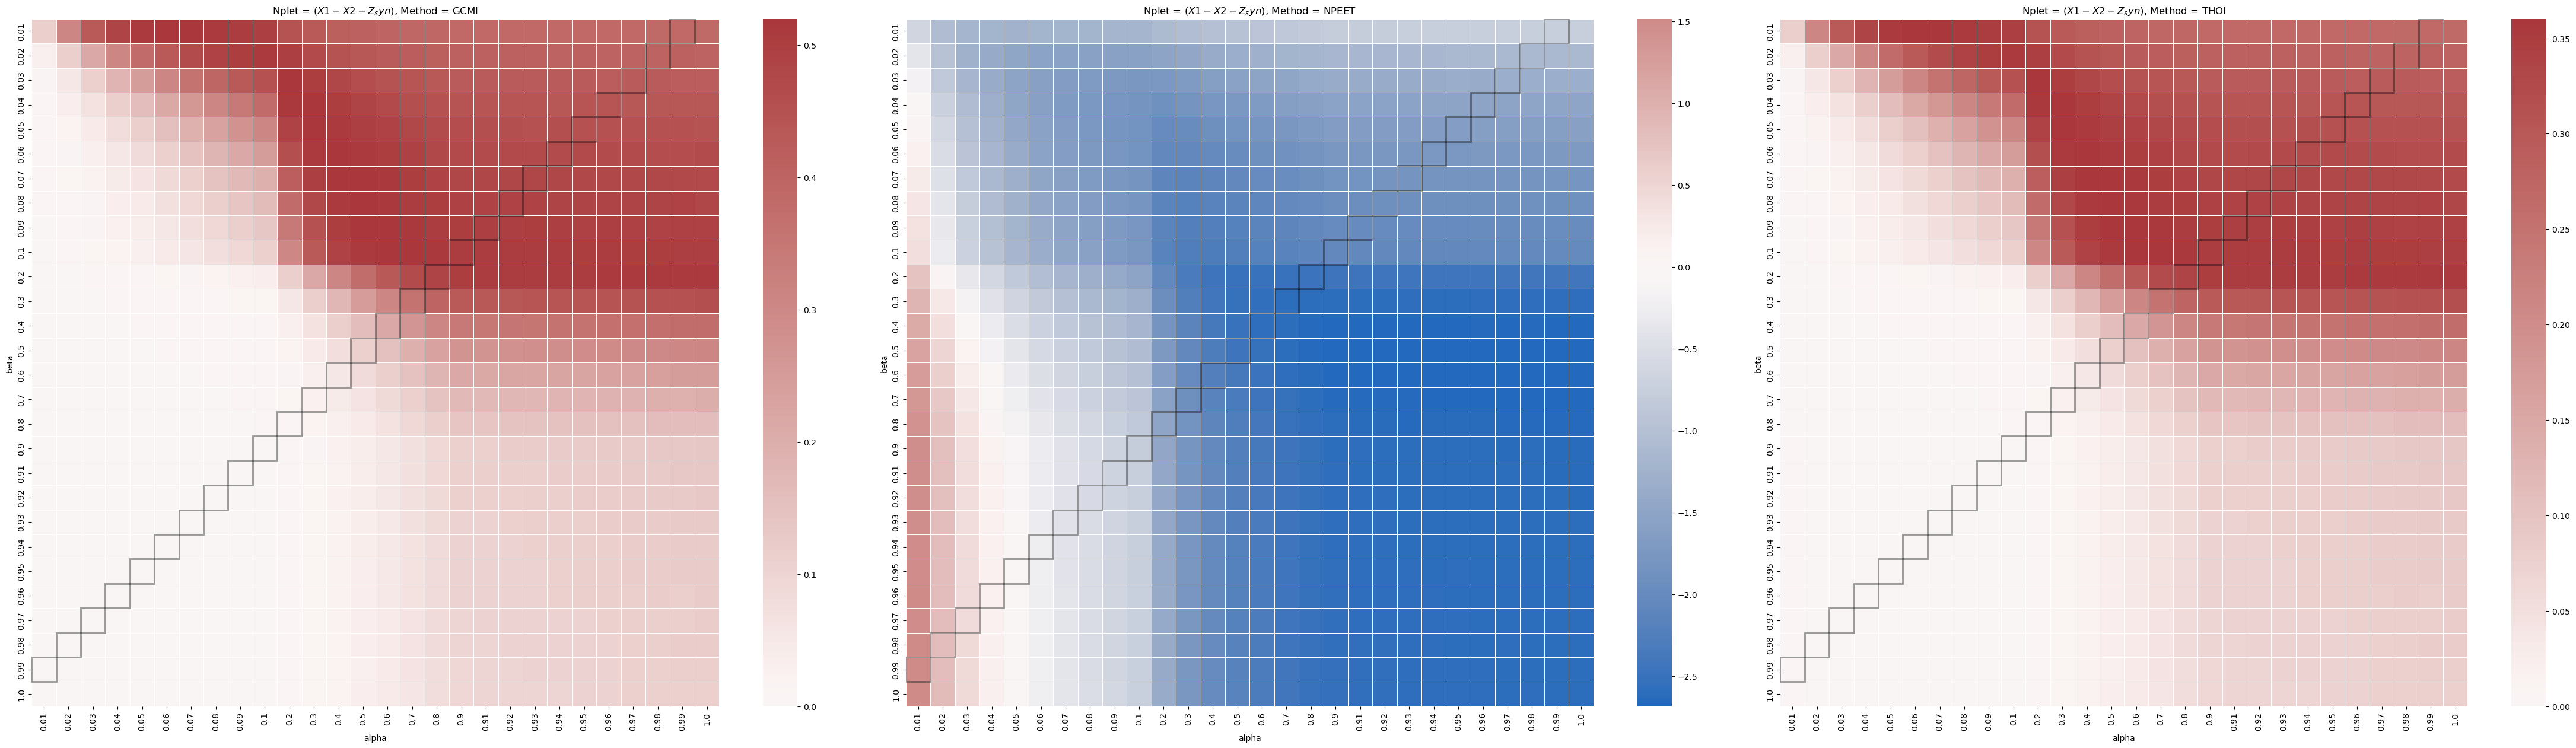

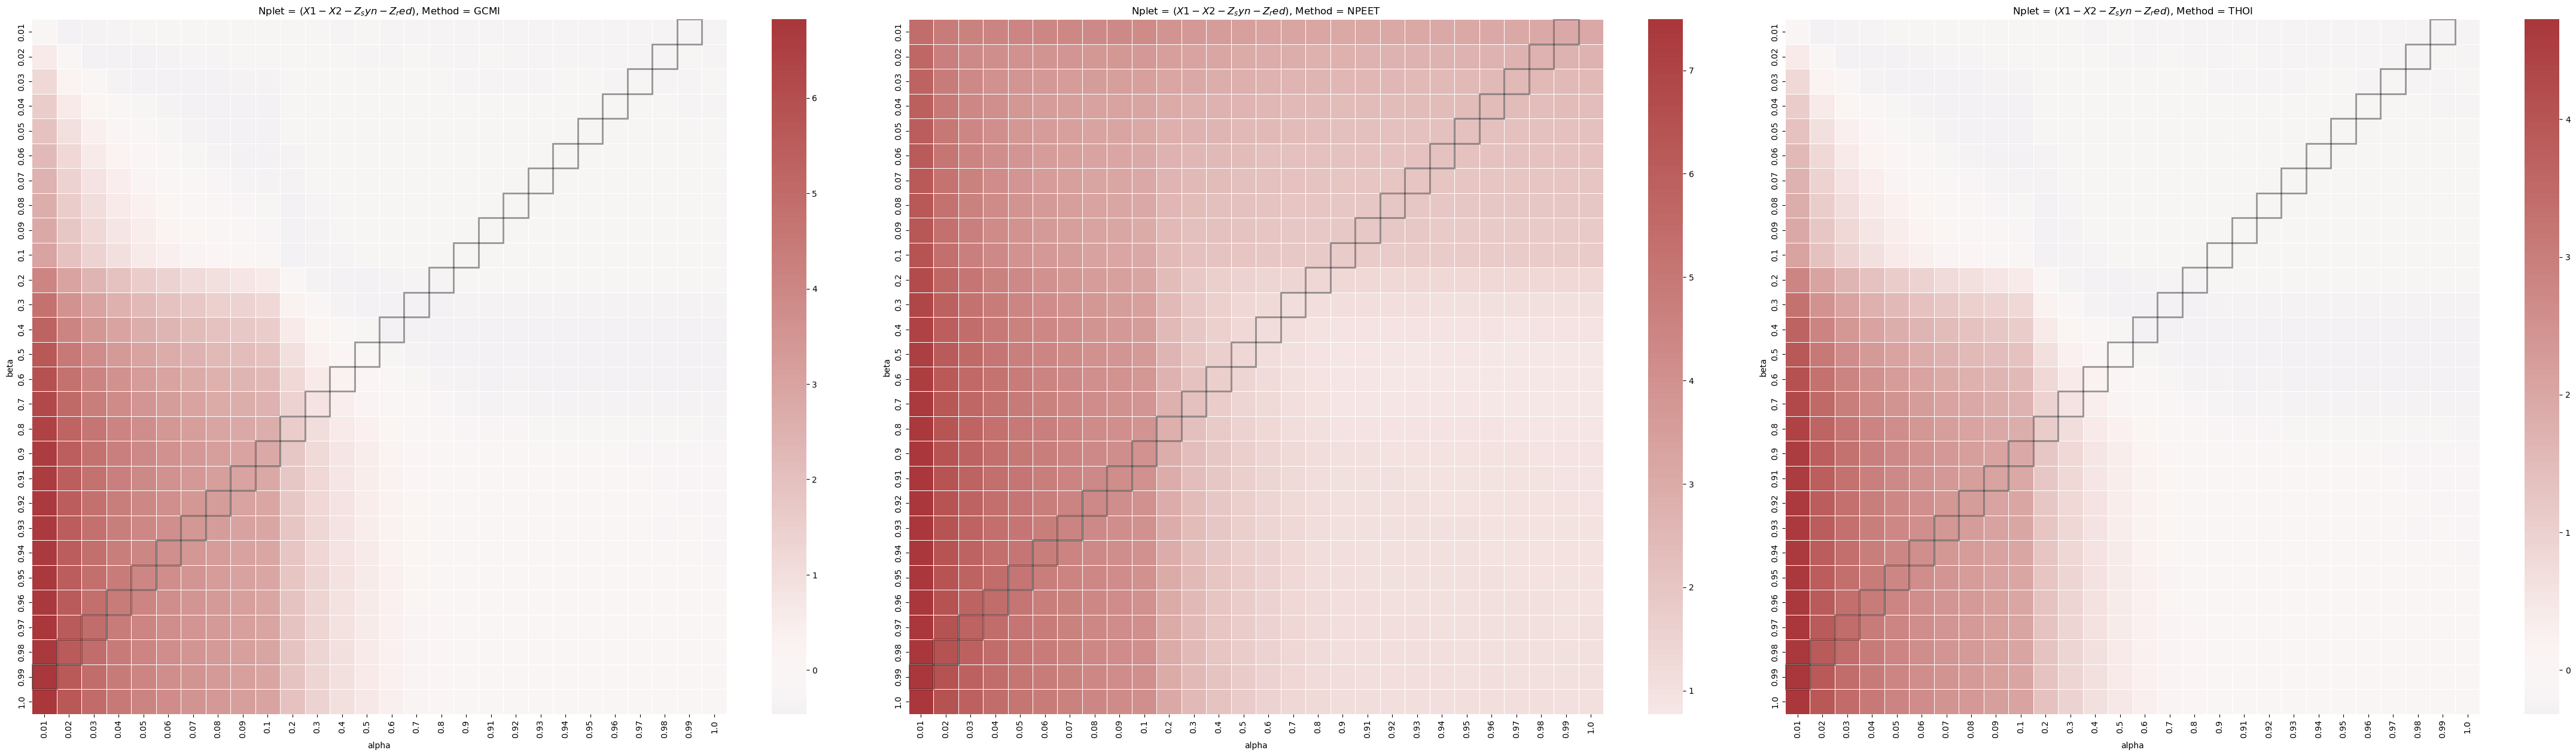

In [77]:
df = pd.read_csv('../benchmarking/results/o_info/system-relu_pow-0.5_repeat-20_t-10000.tsv', sep='\t')

for nplet in df['n-plet'].unique():
    plot_o_info_2d(df, nplet)

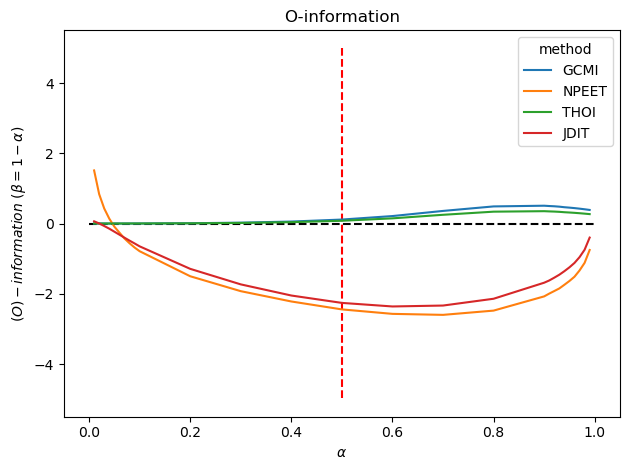

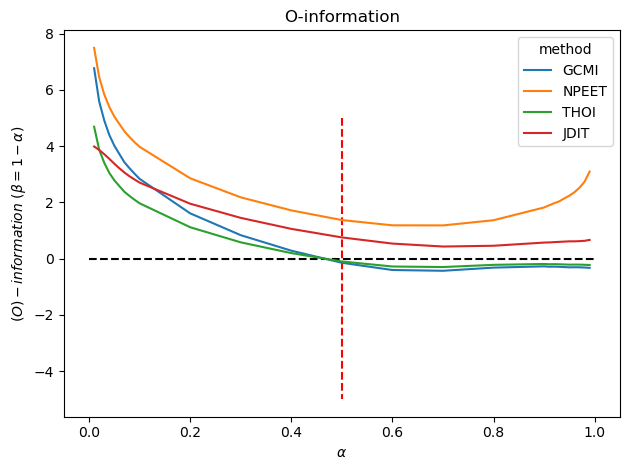

In [10]:
df1 = pd.read_csv('../benchmarking/results/o_info/system-relu_pow-0.5_repeat-20_t-10000.tsv', sep='\t')
df2 = pd.read_csv('../benchmarking/results/o_info/system-relu_pow-0.5_repeat-20_t-10000_JDIT.tsv', sep='\t')

df = pd.concat([df1, df2])

plot_o_info_linear(df, 'X1-X2-Z_syn')
plot_o_info_linear(df, 'X1-X2-Z_syn-Z_red')

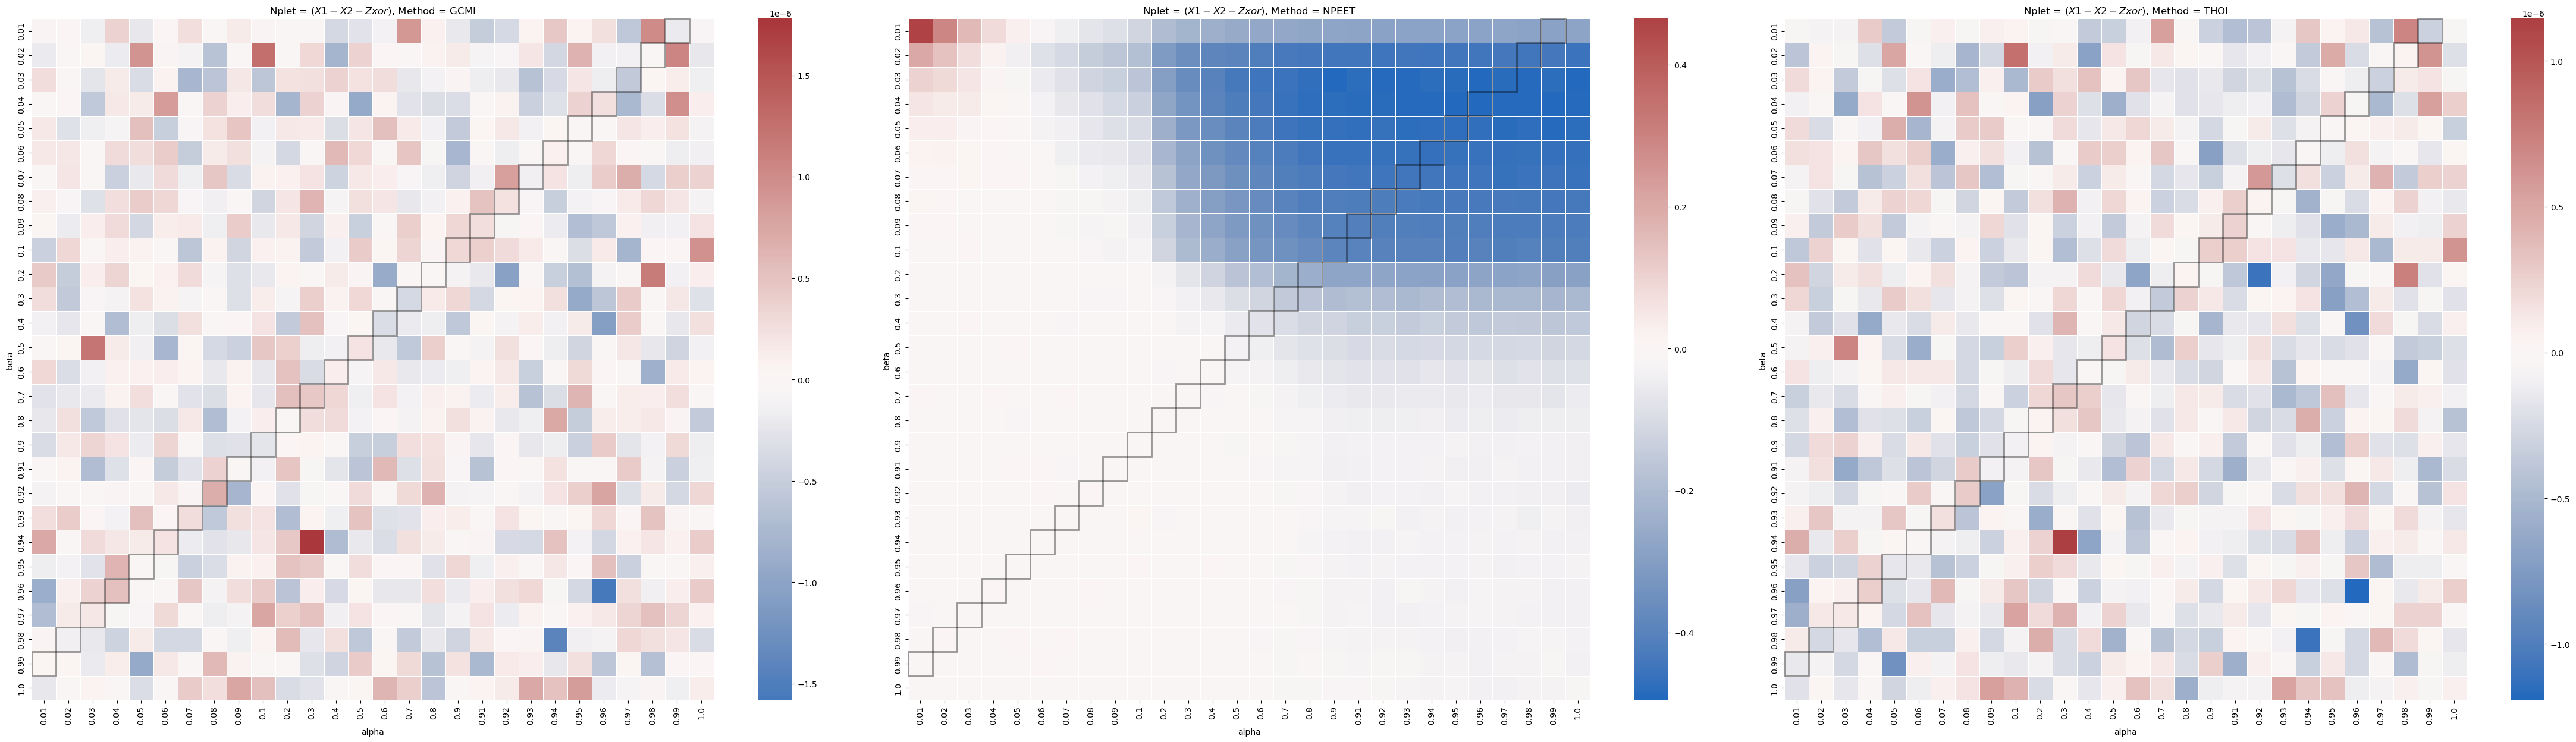

In [78]:
df = pd.read_csv('../benchmarking/results/o_info/system-xor_repeat-20_t-10000.tsv', sep='\t')

for nplet in df['n-plet'].unique():
    plot_o_info_2d(df, nplet)

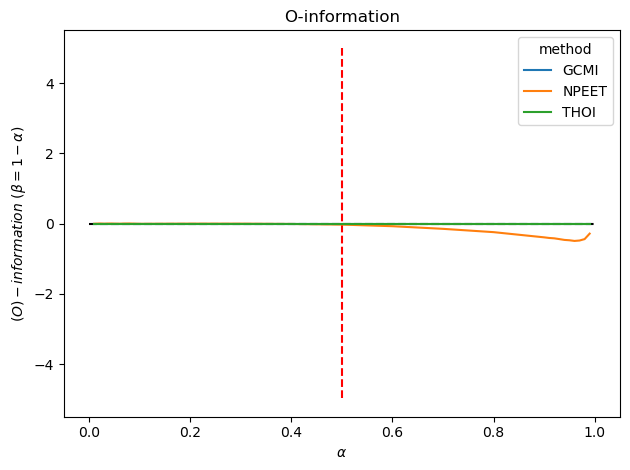

In [75]:
df = pd.read_csv('../benchmarking/results/o_info/system-xor_repeat-20_t-10000.tsv', sep='\t')

plot_o_info_linear(df, 'X1-X2-Zxor')

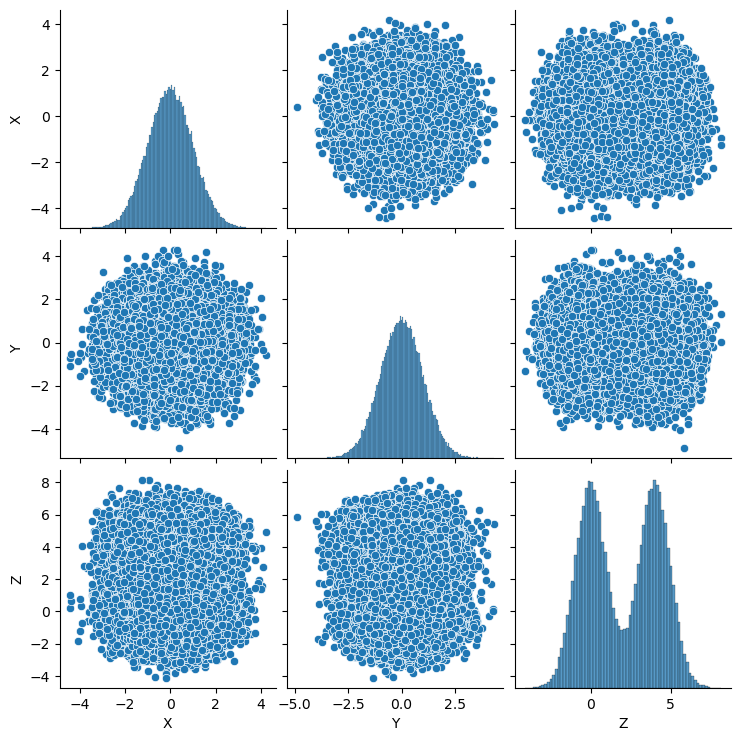

In [177]:
T=100000
X1, X2, Z = np.random.normal(0, 1, size=(3,T))

X1_XOR_X2 = np.logical_xor(X1 > 0, X2 > 0).astype(int)
Zxor = (Z+4) * X1_XOR_X2 + Z * (1-X1_XOR_X2)

df = pd.DataFrame({'X': X1, 'Y': X2, 'Z': Zxor})

sns.pairplot(df)

plt.show()

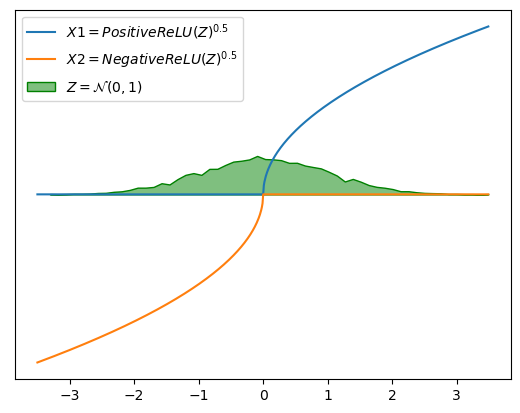

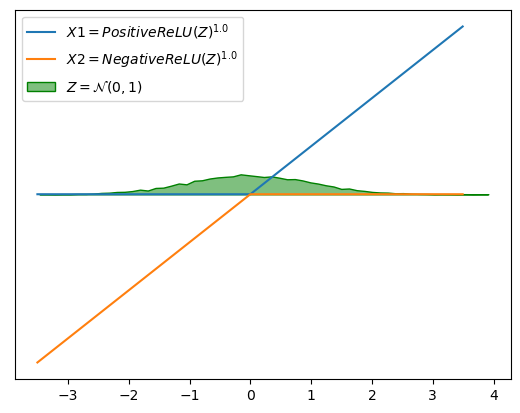

In [61]:
def ReLU(X, cutoff=0):
    return np.maximum(X,cutoff)


def plot_ReLU_system(pow_factor=0.5, ax=None):

    Z = np.arange(-3.5, 3.5, 0.01)
    X1 = np.power(ReLU(Z), pow_factor)
    X2 = -np.power(np.abs(ReLU(-Z)), pow_factor)


    ax = sns.histplot(np.random.normal(0,1,10000), stat='density', element='poly', color='green', alpha=0.5, label=r'$Z = \mathcal{N}(0,1)$', ax=ax)
    sns.lineplot(x=Z, y=X1, label=rf'$X1 = PositiveReLU(Z)^{{ {pow_factor} }}$', ax=ax)
    sns.lineplot(x=Z, y=X2, label=rf'$X2 = NegativeReLU(Z)^{{ {pow_factor} }}$', ax=ax)

    ax.set_ylabel('')
    ax.set_yticks([])


plot_ReLU_system(pow_factor=0.5)
plt.show()

plot_ReLU_system(pow_factor=1.0)
plt.show()

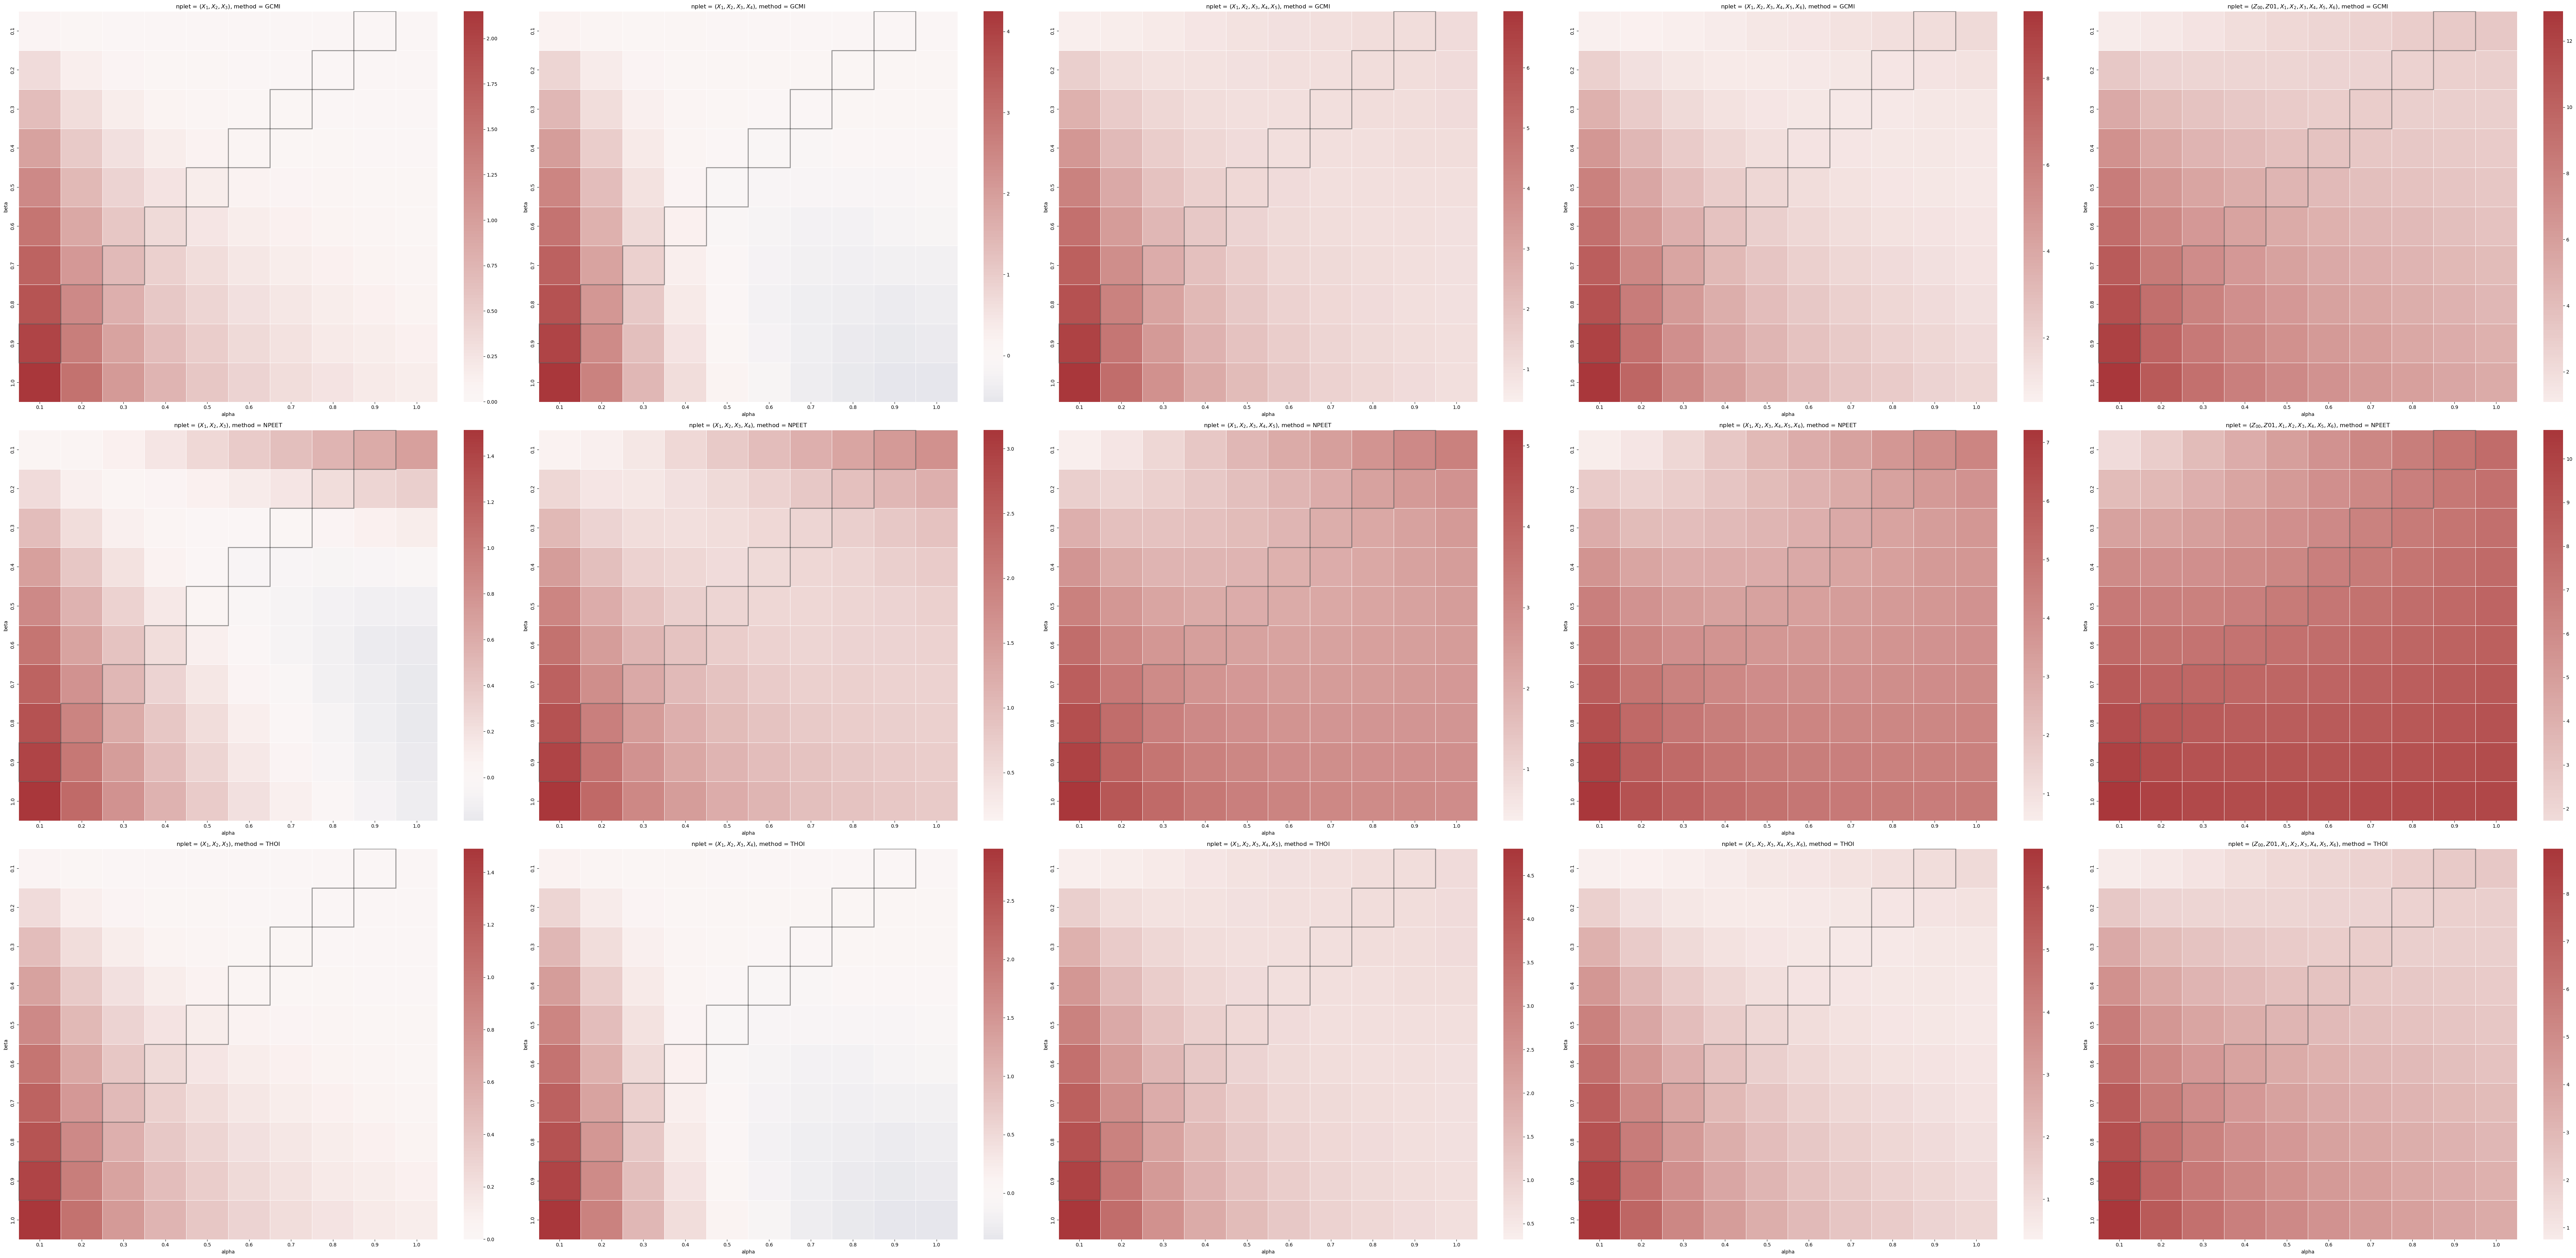

In [65]:
nplets = ['X1-X2-X3','X1-X2-X3-X4','X1-X2-X3-X4-X5','X1-X2-X3-X4-X5-X6','Z00-Z01-X1-X2-X3-X4-X5-X6']

df = pd.read_csv('../benchmarking/results/o_info/system-flat_repeat-20_t-10000.tsv', sep='\t')
df = df[df.gamma == 0.1]
df = df[df['n-plet'].isin(nplets)]

methods = df.groupby('method')

fig, axes = plt.subplots(len(methods), len(nplets), figsize=(len(nplets)*15, len(methods)*12))

for method_axes, (method, df_method) in zip(axes, methods):
      
        for ax, (nplet, df_nplet) in zip(method_axes, df_method.groupby('n-plet')):

            nplet = nplet.replace("X","X_").replace("Z00","Z_{00}").replace("Z00","Z_{01}").replace('-',',')
    
            df_temp = df_nplet[df_nplet['method'] == method]
            plot_o_info_heatmap(df_nplet, 'alpha', 'beta', ax)
            ax.set_title(fr'nplet = $({nplet})$, method = {method}')

plt.tight_layout()
plt.show()